In [7]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  0
2.9.1


In [8]:
import pandas as pd   ## data analysis and manipulation
import numpy as np    ## numerial computing
import seaborn as sns ##  data visualization library based on matplotlib
import tensorflow.keras as keras ## main deep learning API

## additional functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import average_precision_score
from tensorflow.keras.utils import to_categorical

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

In [10]:
#load the data
df = pd.read_csv("/Users/a123456/Desktop/Fei's Project/Data/OCT_BASELINE_GRI__VF_6-3_FP-15_NO_PHI_CombinedProgression.csv")
df

,EID,PID,DOB,Eye,ImageID,Scan.Type,Diameter..mm.,Diameter....,Fixed.in.mm,ExamDate,...,VF_OCT_BASELINE_DIFF,VF_OCT_FINAL_DIFF,MD_BASELINE,MD_FINAL,VFI_BASELINE,VFI_FINAL,Y_GRI,Y_MD,Y_VFI,Y_combined
0,1,1,10/24/1949,LE,282596.0,OCT Circle Scan,3.7,12.0,0,5/11/2017,...,0.000000,3.561944,-2.15,-3.26,98,96,0,0,0,0
1,2,1,10/24/1949,RE,282593.0,OCT Circle Scan,3.7,12.0,0,5/11/2017,...,0.000000,3.561944,-7.73,-11.45,82,73,1,0,0,1
2,3,2,8/7/1939,LE,239514.0,OCT Circle Scan,3.4,12.0,0,8/26/2014,...,0.000000,6.151951,-1.28,-1.13,98,97,0,0,0,0
3,4,2,8/7/1939,RE,239512.0,OCT Circle Scan,3.4,12.0,0,8/26/2014,...,0.000000,6.151951,-0.72,0.60,98,99,0,0,0,0
4,5,3,5/20/1943,LE,238460.0,OCT Circle Scan,3.5,12.0,0,7/9/2014,...,0.024641,6.266940,-1.69,-0.51,99,99,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,580,329,3/22/1952,RE,837.0,OCT Circle Scan,3.7,12.0,0,5/5/2011,...,0.000000,9.601643,0.53,-2.51,98,93,1,0,0,1
580,581,330,5/15/1945,LE,243095.0,OCT Circle Scan,3.5,12.0,0,12/17/2014,...,0.000000,5.941136,-8.97,-14.71,78,56,1,1,1,1
581,582,330,5/15/1945,RE,243093.0,OCT Circle Scan,3.7,12.0,0,12/17/2014,...,0.000000,5.941136,-11.39,-11.37,70,67,1,0,0,1
582,583,331,5/31/1939,LE,109347.0,OCT Circle Scan,3.5,12.0,0,8/13/2013,...,0.172485,6.193018,-3.48,-19.28,97,51,1,1,1,1


In [11]:
#filter only circle scan data
circle_scan = (df['Scan.Type'] == 'OCT Circle Scan')
df = df[circle_scan]
df.shape

(580, 815)

In [12]:
df_raw = df

We will use 'Y_combined' instead of 'Y_GRI' as our dependent variable.

**Idea 1: Using 'RNFLT 1 to 768' as the predictors, 'Y_combined' as the dependent variable, no resampling, CNN method  
Idea 2: Using 'RNFLT 1 to 768' as the predictors, 'Y_combined' as the dependent variable, with resampling, CNN method  
Idea 3: Using 'RNFLT 1 to 768' as the predictors, 'Y_combined' as the dependent variable, no resampling, k-fold validation method  
Idea 4: Using 'RNFLT 1 to 768' as the predictors, 'Y_combined' as the dependent variable, with resampling, k-fold validation method  
Idea 5: Using all numerical values as the predictors, 'Y_combined' as the dependent variable, no resampling, CNN method  
Idea 6: Using all numerical values as the predictors, 'Y_combined' as the dependent variable, with resampling, CNN method  
Idea 7: Using all numerical values as the predictors, 'Y_combined' as the dependent variable, no resampling, k-fold method  
Idea 8: Using all numerical values as the predictors, 'Y_combined' as the dependent variable, with resampling, k-fold method**

### Idea 1: Using 'RNFLT 1 to 768' as the predictors, 'Y_combined' as the dependent variable, no resampling, CNN method

In [13]:
df = df_raw.iloc[:, np.r_[1, 28:797, 814]]
df

,PID,RNFLT.1,RNFLT.2,RNFLT.3,RNFLT.4,RNFLT.5,RNFLT.6,RNFLT.7,RNFLT.8,RNFLT.9,...,RNFLT.761,RNFLT.762,RNFLT.763,RNFLT.764,RNFLT.765,RNFLT.766,RNFLT.767,RNFLT.768,GRI,Y_combined
0,1,47.0,47.0,46.0,46.0,45.0,45.0,45.0,45.0,45.0,...,48.0,48.0,48.0,48.0,48.0,48.0,48.0,47.0,-3.688171,0
1,1,70.0,71.0,72.0,72.0,73.0,73.0,73.0,73.0,74.0,...,60.0,61.0,62.0,63.0,65.0,66.0,67.0,69.0,-6.827438,1
2,2,44.0,45.0,45.0,45.0,46.0,47.0,48.0,50.0,51.0,...,45.0,45.0,45.0,45.0,45.0,45.0,45.0,44.0,0.329429,0
3,2,44.0,44.0,44.0,45.0,45.0,46.0,46.0,47.0,47.0,...,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,0.581343,0
4,3,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,46.0,...,35.0,35.0,35.0,35.0,35.0,35.0,36.0,36.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,329,100.0,103.0,106.0,108.0,111.0,112.0,113.0,113.0,113.0,...,83.0,84.0,86.0,87.0,89.0,92.0,94.0,97.0,-11.691467,1
580,330,52.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,...,47.0,47.0,48.0,48.0,49.0,49.0,50.0,51.0,-19.908699,1
581,330,62.0,63.0,64.0,65.0,66.0,67.0,68.0,68.0,68.0,...,55.0,56.0,57.0,58.0,58.0,59.0,60.0,61.0,-10.130481,1
582,331,47.0,47.0,48.0,48.0,49.0,49.0,50.0,50.0,50.0,...,47.0,46.0,46.0,45.0,45.0,46.0,46.0,46.0,-24.731627,1


In [14]:
#drop missing values
df = df.dropna()
df.isnull().values.sum()
df.shape

(575, 771)

In [15]:
y = df.iloc[:, 770]
y

0      0
1      1
2      0
3      0
4      0
      ..
579    1
580    1
581    1
582    1
583    1
Name: Y_combined, Length: 575, dtype: int64

In [16]:
# https://github.com/applied-systems-biology/Dynamic_SPHARM/blob/master/SPHARM/classes/stratified_group_shuffle_split.py

from __future__ import print_function
from __future__ import division

from sklearn.utils.validation import check_array
from sklearn.model_selection import StratifiedShuffleSplit


class GroupShuffleSplitStratified(StratifiedShuffleSplit):

    def __init__(self, n_splits=5, test_size=2, train_size=None, random_state=None):

        super(GroupShuffleSplitStratified, self).__init__(
            n_splits=n_splits,
            test_size=test_size,
            train_size=train_size,
            random_state=random_state)

    def _iter_indices(self, X, y, groups):
        if groups is None:
            raise ValueError("The 'groups' parameter should not be None.")
        groups = check_array(groups, ensure_2d=False, dtype=None)
        groups_unique, group_indices = np.unique(groups, return_inverse=True)
        classes = []
        for gr in groups_unique:
            classes.append(y[np.where(groups==gr)[0][0]])

        for group_train, group_test in super(
                GroupShuffleSplitStratified, self)._iter_indices(X=groups_unique, y=classes):
            # these are the indices of classes in the partition
            # invert them into data indices

            train = np.flatnonzero(np.in1d(group_indices, group_train))
            test = np.flatnonzero(np.in1d(group_indices, group_test))

            yield train, test

    def split(self, X, y=None, groups=None):
        return super(GroupShuffleSplitStratified, self).split(X, y, groups)

In [17]:
train_i,test_i = next(GroupShuffleSplitStratified(n_splits=2, test_size=0.1,
                                        random_state=8).split(df,y, groups=df['PID']))
TrainVal = df.iloc[train_i]
TestSet = df.iloc[test_i]
print(TrainVal.shape)
print(TestSet.shape)

(516, 771)
(59, 771)


In [18]:
train_id,val_id = next(GroupShuffleSplitStratified(n_splits=2, test_size=0.1,
                                        random_state=8).split(TrainVal,y.iloc[train_i], groups=TrainVal['PID']))
TrainSet = TrainVal.iloc[train_id]
ValSet = TrainVal.iloc[val_id]
print(TrainSet.shape)
print(ValSet.shape)

(463, 771)
(53, 771)


In [19]:
x = df.iloc[test_i, 1:769]
print(x.isnull().values.sum())
print(x.shape)
x.head()

0
(59, 768)


,RNFLT.1,RNFLT.2,RNFLT.3,RNFLT.4,RNFLT.5,RNFLT.6,RNFLT.7,RNFLT.8,RNFLT.9,RNFLT.10,...,RNFLT.759,RNFLT.760,RNFLT.761,RNFLT.762,RNFLT.763,RNFLT.764,RNFLT.765,RNFLT.766,RNFLT.767,RNFLT.768
28,60.0,61.0,61.0,62.0,62.0,63.0,63.0,64.0,64.0,65.0,...,53.0,54.0,54.0,55.0,55.0,56.0,57.0,58.0,58.0,59.0
29,100.0,104.0,106.0,106.0,104.0,101.0,97.0,92.0,88.0,84.0,...,61.0,63.0,64.0,67.0,70.0,74.0,79.0,84.0,90.0,95.0
71,35.0,36.0,37.0,37.0,38.0,39.0,40.0,40.0,41.0,42.0,...,30.0,30.0,30.0,31.0,31.0,32.0,32.0,33.0,34.0,34.0
72,73.0,73.0,73.0,74.0,74.0,75.0,75.0,76.0,77.0,77.0,...,72.0,72.0,72.0,72.0,72.0,72.0,73.0,73.0,73.0,73.0
73,85.0,86.0,87.0,88.0,89.0,91.0,93.0,94.0,96.0,98.0,...,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0


In [20]:
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_test = scaled_x
print(X_test.shape)

(59, 768, 1)


In [21]:
x = TrainVal.iloc[train_id, 1:769]
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_train = scaled_x
print(X_train.shape)

(463, 768, 1)


In [22]:
x = TrainVal.iloc[val_id, 1:769]
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_val = scaled_x
print(X_val.shape)

(53, 768, 1)


Reshape the X matrix ONLY FOR CNN models, do not need to reshape for RF or SVM 

In [23]:
#one-hot-encoding our label
y = pd.get_dummies(y)
print(y.value_counts())
y #The second column is 'progressor', The first column is 'non-progressor'

0  1
1  0    394
0  1    181
dtype: int64


,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
579,0,1
580,0,1
581,0,1
582,0,1


In [24]:
y = y.rename(columns={0: "Non-Progressor", 1: "Progressor"})
y

,Non-Progressor,Progressor
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
579,0,1
580,0,1
581,0,1
582,0,1


In [25]:
y_test = y.iloc[test_i]
y_test

,Non-Progressor,Progressor
28,1,0
29,1,0
71,0,1
72,0,1
73,0,1
96,0,1
97,1,0
122,1,0
123,0,1
152,1,0


In [26]:
y_train = y.iloc[train_i].iloc[train_id]
y_train

,Non-Progressor,Progressor
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
579,0,1
580,0,1
581,0,1
582,0,1


In [27]:
y_val = y.iloc[train_i].iloc[val_id]
y_val

,Non-Progressor,Progressor
12,0,1
32,1,0
33,1,0
40,0,1
49,0,1
50,1,0
102,0,1
126,1,0
127,1,0
128,0,1


In [28]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.value_counts(), '\n')
print(y_val.value_counts(), '\n')
print(y_test.value_counts())

(463, 768, 1)
(59, 768, 1)
(53, 768, 1)
Non-Progressor  Progressor
1               0             321
0               1             142
dtype: int64 

Non-Progressor  Progressor
1               0             35
0               1             18
dtype: int64 

Non-Progressor  Progressor
1               0             38
0               1             21
dtype: int64


In [156]:
#create model1
model_1 = Sequential()

#add layers
model_1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_1.add(MaxPooling1D(pool_size=3))
# model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_1.add(Dropout(0.5))
# model_1.add(MaxPooling1D(pool_size=2))
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 766, 64)           256       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 255, 64)          0         
 1D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 255, 64)           0         
                                                                 
 flatten_7 (Flatten)         (None, 16320)             0         
                                                                 
 dense_21 (Dense)            (None, 64)                1044544   
                                                                 
 dense_22 (Dense)            (None, 16)                1040      
                                                      

In [157]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [158]:
model_1.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_1.fit(X_train, y_train, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
15/15 [==============================] - 1s 37ms/step - loss: 0.6434 - accuracy: 0.6782 - val_loss: 0.6278 - val_accuracy: 0.6604
Epoch 2/500
15/15 [==============================] - 0s 27ms/step - loss: 0.6111 - accuracy: 0.6933 - val_loss: 0.6216 - val_accuracy: 0.6604
Epoch 3/500
15/15 [==============================] - 0s 27ms/step - loss: 0.6093 - accuracy: 0.6933 - val_loss: 0.6212 - val_accuracy: 0.6604
Epoch 4/500
15/15 [==============================] - 0s 24ms/step - loss: 0.6067 - accuracy: 0.6933 - val_loss: 0.6178 - val_accuracy: 0.6604
Epoch 5/500
15/15 [==============================] - 0s 24ms/step - loss: 0.6027 - accuracy: 0.6933 - val_loss: 0.6165 - val_accuracy: 0.6604
Epoch 6/500
15/15 [==============================] - 0s 24ms/step - loss: 0.6011 - accuracy: 0.6933 - val_loss: 0.6163 - val_accuracy: 0.6604
Epoch 7/500
15/15 [==============================] - 0s 28ms/step - loss: 0.5987 - accuracy: 0.6933 - val_loss: 0.6121 - val_accuracy: 0.6604
Epoch 

15/15 [==============================] - 0s 22ms/step - loss: 0.4055 - accuracy: 0.8164 - val_loss: 0.6615 - val_accuracy: 0.6226
Epoch 116/500
15/15 [==============================] - 0s 25ms/step - loss: 0.4000 - accuracy: 0.8359 - val_loss: 0.6597 - val_accuracy: 0.6415
Epoch 117/500
15/15 [==============================] - 0s 22ms/step - loss: 0.4021 - accuracy: 0.8380 - val_loss: 0.6558 - val_accuracy: 0.6415
Epoch 118/500
15/15 [==============================] - 0s 23ms/step - loss: 0.4011 - accuracy: 0.8380 - val_loss: 0.6705 - val_accuracy: 0.6415
Epoch 119/500
15/15 [==============================] - 0s 25ms/step - loss: 0.3958 - accuracy: 0.8272 - val_loss: 0.6701 - val_accuracy: 0.6415
Epoch 120/500
15/15 [==============================] - 0s 25ms/step - loss: 0.3966 - accuracy: 0.8359 - val_loss: 0.6684 - val_accuracy: 0.6038
Epoch 121/500
15/15 [==============================] - 0s 24ms/step - loss: 0.3969 - accuracy: 0.8402 - val_loss: 0.6639 - val_accuracy: 0.6415
Epoch 

Epoch 172/500
15/15 [==============================] - 0s 27ms/step - loss: 0.2894 - accuracy: 0.9050 - val_loss: 0.7146 - val_accuracy: 0.6226
Epoch 173/500
15/15 [==============================] - 0s 26ms/step - loss: 0.2879 - accuracy: 0.8985 - val_loss: 0.6879 - val_accuracy: 0.6415
Epoch 174/500
15/15 [==============================] - 0s 26ms/step - loss: 0.2842 - accuracy: 0.9028 - val_loss: 0.7058 - val_accuracy: 0.6415
Epoch 175/500
15/15 [==============================] - 0s 25ms/step - loss: 0.2904 - accuracy: 0.9071 - val_loss: 0.7026 - val_accuracy: 0.6415
Epoch 176/500
15/15 [==============================] - 0s 26ms/step - loss: 0.2760 - accuracy: 0.9222 - val_loss: 0.7082 - val_accuracy: 0.6604
Epoch 177/500
15/15 [==============================] - 0s 25ms/step - loss: 0.2747 - accuracy: 0.8963 - val_loss: 0.7003 - val_accuracy: 0.6604
Epoch 178/500
15/15 [==============================] - 0s 26ms/step - loss: 0.2859 - accuracy: 0.8942 - val_loss: 0.7113 - val_accuracy:

In [159]:
m1_eval_test = model_1.evaluate(X_test, y_test)
m1_eval_val = model_1.evaluate(X_val, y_val)

2/2 [==============================] - 0s 11ms/step - loss: 0.6293 - accuracy: 0.6792


In [160]:
pred = model_1.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 4ms/step
roc auc score:  0.7180451127819549
average precision score:  0.7061168466336795


In [161]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 5ms/step - loss: 0.5927 - accuracy: 0.7458


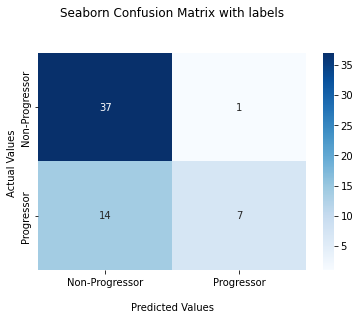

In [162]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_1.evaluate(X_test, y_test)
plt.show()

**For validation set:**

In [163]:
pred = model_1.predict(X_val)
roc_value = roc_auc_score(y_val, pred)
ap_score = average_precision_score(y_val, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 9ms/step
roc auc score:  0.6412698412698412
average precision score:  0.5987637903380651


In [164]:
pred
#No predicted progressors with a high prob in second column ('Progressor')

array([[0.65164775, 0.34835228],
       [0.41271812, 0.5872818 ],
       [0.87526125, 0.12473873],
       [0.72000605, 0.27999398],
       [0.86457425, 0.1354257 ],
       [0.6742969 , 0.32570317],
       [0.49222475, 0.5077752 ],
       [0.85723984, 0.14276013],
       [0.8022537 , 0.19774629],
       [0.40801024, 0.5919898 ],
       [0.57469654, 0.42530346],
       [0.6181532 , 0.3818468 ],
       [0.78752077, 0.21247931],
       [0.8657124 , 0.13428752],
       [0.56509924, 0.4349008 ],
       [0.6007261 , 0.3992739 ],
       [0.93552244, 0.06447752],
       [0.8328599 , 0.16714007],
       [0.7071036 , 0.29289633],
       [0.8574806 , 0.14251947],
       [0.50772214, 0.49227783],
       [0.4465445 , 0.55345553],
       [0.8560331 , 0.14396694],
       [0.85172397, 0.14827603],
       [0.3874886 , 0.61251146],
       [0.46836576, 0.5316342 ],
       [0.67935246, 0.32064754],
       [0.9201101 , 0.07988991],
       [0.8643532 , 0.13564683],
       [0.5796716 , 0.4203284 ],
       [0.

In [165]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_val_np = y_val.to_numpy()
y_val_np = y_val_np.astype('int32')

2/2 [==============================] - 0s 7ms/step - loss: 0.6293 - accuracy: 0.6792


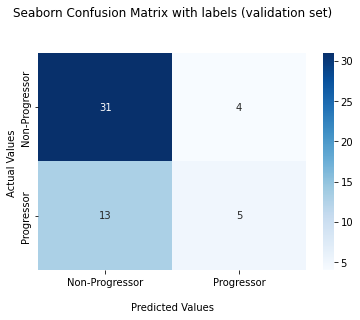

In [166]:
cf_matrix = confusion_matrix(y_val_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels (validation set)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_1.evaluate(X_val, y_val)
plt.show()

**Still we can see the training model cannot provide a good prediction for the real progressor.**

### Idea 2: Using 'RNFLT 1 to 768' as the predictors, 'Y_combined' as the dependent variable, with resampling, CNN method

In [167]:
y_progressor = np.array(y_train)[:,1]
y_progressor

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [168]:
len(y_progressor)

463

In [169]:
X_train.shape

(463, 768, 1)

In [170]:
X_train_2d = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_train_2d.shape

(463, 768)

In [171]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 'minority')
X_train_over, y_train_over = oversample.fit_resample(X_train_2d, y_progressor)
print(X_train_over.shape)
y_train_over

(642, 768)


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [172]:
y_train_over = pd.get_dummies(y_train_over)
y_train_over

,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
637,0,1
638,0,1
639,0,1
640,0,1


In [173]:
y_train_over=y_train_over.rename(columns={0: "Non-Progressor", 1: "Progressor"})
print(y_train_over.value_counts(), '\n')

Non-Progressor  Progressor
0               1             321
1               0             321
dtype: int64 



In [174]:
print(y_train.value_counts(), '\n')

Non-Progressor  Progressor
1               0             321
0               1             142
dtype: int64 



In [175]:
y_train_over

,Non-Progressor,Progressor
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
637,0,1
638,0,1
639,0,1
640,0,1


In [176]:
X_train_over.shape

(642, 768)

In [177]:
X_train_over = np.reshape(X_train_over, (X_train_over.shape[0], X_train_over.shape[1], 1))
X_train_over

array([[[0.12335958],
        [0.12335958],
        [0.12073491],
        ...,
        [0.12598425],
        [0.12598425],
        [0.12335958]],

       [[0.18372703],
        [0.18635171],
        [0.18897638],
        ...,
        [0.17322835],
        [0.17585302],
        [0.18110236]],

       [[0.11548556],
        [0.11811024],
        [0.11811024],
        ...,
        [0.11811024],
        [0.11811024],
        [0.11548556]],

       ...,

       [[0.14435696],
        [0.14698163],
        [0.14698163],
        ...,
        [0.14698163],
        [0.14698163],
        [0.14435696]],

       [[0.46981627],
        [0.46456693],
        [0.45931759],
        ...,
        [0.48293963],
        [0.48031496],
        [0.47506562]],

       [[0.08136483],
        [0.08136483],
        [0.0839895 ],
        ...,
        [0.07874016],
        [0.07874016],
        [0.07874016]]])

In [178]:
#create model2
model_2 = Sequential()

#add layers
model_2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_2.add(MaxPooling1D(pool_size=3))
# model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_2.add(Dropout(0.5))
# model_1.add(MaxPooling1D(pool_size=2))
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(2, activation='softmax'))
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 766, 64)           256       
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 255, 64)          0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 255, 64)           0         
                                                                 
 flatten_8 (Flatten)         (None, 16320)             0         
                                                                 
 dense_24 (Dense)            (None, 64)                1044544   
                                                                 
 dense_25 (Dense)            (None, 16)                1040      
                                                      

In [179]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [180]:
model_2.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_2.fit(X_train_over, y_train_over, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
21/21 [==============================] - 1s 32ms/step - loss: 0.6940 - accuracy: 0.4875 - val_loss: 0.6866 - val_accuracy: 0.6604
Epoch 2/500
21/21 [==============================] - 1s 25ms/step - loss: 0.6917 - accuracy: 0.5031 - val_loss: 0.6721 - val_accuracy: 0.6604
Epoch 3/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6912 - accuracy: 0.5000 - val_loss: 0.6756 - val_accuracy: 0.6604
Epoch 4/500
21/21 [==============================] - 1s 28ms/step - loss: 0.6900 - accuracy: 0.5016 - val_loss: 0.6752 - val_accuracy: 0.6604
Epoch 5/500
21/21 [==============================] - 1s 25ms/step - loss: 0.6897 - accuracy: 0.5234 - val_loss: 0.6808 - val_accuracy: 0.6604
Epoch 6/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6895 - accuracy: 0.5888 - val_loss: 0.6734 - val_accuracy: 0.6792
Epoch 7/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6873 - accuracy: 0.5576 - val_loss: 0.6788 - val_accuracy: 0.6981
Epoch 

In [181]:
m2_eval_test = model_2.evaluate(X_test, y_test)
m2_eval_val = model_2.evaluate(X_val, y_val)

2/2 [==============================] - 0s 12ms/step - loss: 0.6334 - accuracy: 0.7358


In [182]:
pred = model_2.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 12ms/step
roc auc score:  0.7418546365914787
average precision score:  0.7452541555026557


In [183]:
pred

array([[0.63769215, 0.3623079 ],
       [0.61531943, 0.38468057],
       [0.45191416, 0.54808587],
       [0.47715497, 0.5228451 ],
       [0.5386943 , 0.46130568],
       [0.42581838, 0.5741817 ],
       [0.46023387, 0.53976613],
       [0.5591939 , 0.44080612],
       [0.45377207, 0.54622793],
       [0.61740714, 0.3825929 ],
       [0.5756217 , 0.4243783 ],
       [0.5253378 , 0.47466215],
       [0.46313027, 0.53686976],
       [0.56586444, 0.43413553],
       [0.5519507 , 0.44804937],
       [0.65226966, 0.34773028],
       [0.6507214 , 0.34927866],
       [0.5483357 , 0.45166433],
       [0.5034891 , 0.4965109 ],
       [0.60293835, 0.39706168],
       [0.6268571 , 0.3731429 ],
       [0.4906781 , 0.5093218 ],
       [0.47852984, 0.5214701 ],
       [0.5101047 , 0.48989522],
       [0.6149709 , 0.3850291 ],
       [0.56360155, 0.4363985 ],
       [0.56548727, 0.43451267],
       [0.52956575, 0.47043425],
       [0.64718634, 0.35281366],
       [0.5306633 , 0.46933672],
       [0.

In [184]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 8ms/step - loss: 0.6296 - accuracy: 0.7119


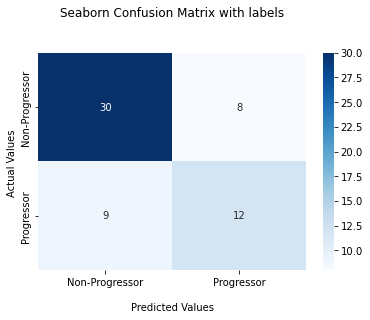

In [185]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m2_eval_test = model_2.evaluate(X_test, y_test)
plt.show()

**Run 100, 200, 500 rounds (patience = 100, 200, 500)**

In [186]:
#create model2_nocall
model_2_100 = Sequential()

#add layers
model_2_100.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_2_100.add(MaxPooling1D(pool_size=3))
# model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_2_100.add(Dropout(0.5))
# model_1.add(MaxPooling1D(pool_size=2))
model_2_100.add(Flatten())
model_2_100.add(Dense(64, activation='relu'))
model_2_100.add(Dense(16, activation='relu'))
model_2_100.add(Dense(2, activation='softmax'))
model_2_100.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 766, 64)           256       
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 255, 64)          0         
 1D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 255, 64)           0         
                                                                 
 flatten_9 (Flatten)         (None, 16320)             0         
                                                                 
 dense_27 (Dense)            (None, 64)                1044544   
                                                                 
 dense_28 (Dense)            (None, 16)                1040      
                                                      

In [187]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [188]:
model_2_100.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_2_100.fit(X_train_over, y_train_over, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
21/21 [==============================] - 1s 32ms/step - loss: 0.6934 - accuracy: 0.5016 - val_loss: 0.6856 - val_accuracy: 0.6604
Epoch 2/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6914 - accuracy: 0.4969 - val_loss: 0.6721 - val_accuracy: 0.6604
Epoch 3/500
21/21 [==============================] - 1s 25ms/step - loss: 0.6885 - accuracy: 0.4969 - val_loss: 0.6645 - val_accuracy: 0.6604
Epoch 4/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6857 - accuracy: 0.4969 - val_loss: 0.6701 - val_accuracy: 0.7170
Epoch 5/500
21/21 [==============================] - 1s 25ms/step - loss: 0.6841 - accuracy: 0.5498 - val_loss: 0.6627 - val_accuracy: 0.7170
Epoch 6/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6796 - accuracy: 0.5639 - val_loss: 0.6629 - val_accuracy: 0.7358
Epoch 7/500
21/21 [==============================] - 1s 28ms/step - loss: 0.6765 - accuracy: 0.5966 - val_loss: 0.6547 - val_accuracy: 0.7358
Epoch 

In [189]:
m2_eval_test = model_2_100.evaluate(X_test, y_test)
m2_eval_val = model_2_100.evaluate(X_val, y_val)

2/2 [==============================] - 0s 9ms/step - loss: 0.6629 - accuracy: 0.7358


In [190]:
pred = model_2_100.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 8ms/step
roc auc score:  0.7092731829573935
average precision score:  0.679132020550737


In [191]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 8ms/step - loss: 0.6623 - accuracy: 0.6949


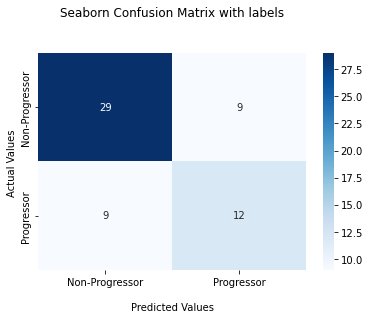

In [192]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m2_eval_test = model_2_100.evaluate(X_test, y_test)
plt.show()

200:

In [193]:
#create model2_nocall
model_2_200 = Sequential()

#add layers
model_2_200.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_2_200.add(MaxPooling1D(pool_size=3))
# model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_2_200.add(Dropout(0.5))
# model_1.add(MaxPooling1D(pool_size=2))
model_2_200.add(Flatten())
model_2_200.add(Dense(64, activation='relu'))
model_2_200.add(Dense(16, activation='relu'))
model_2_200.add(Dense(2, activation='softmax'))
model_2_200.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 766, 64)           256       
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 255, 64)          0         
 g1D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 255, 64)           0         
                                                                 
 flatten_10 (Flatten)        (None, 16320)             0         
                                                                 
 dense_30 (Dense)            (None, 64)                1044544   
                                                                 
 dense_31 (Dense)            (None, 16)                1040      
                                                     

In [194]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=200,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [195]:
model_2_200.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_2_200.fit(X_train_over, y_train_over, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
21/21 [==============================] - 1s 33ms/step - loss: 0.6942 - accuracy: 0.5093 - val_loss: 0.6745 - val_accuracy: 0.6604
Epoch 2/500
21/21 [==============================] - 1s 25ms/step - loss: 0.6932 - accuracy: 0.5031 - val_loss: 0.6650 - val_accuracy: 0.6604
Epoch 3/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6900 - accuracy: 0.5265 - val_loss: 0.6747 - val_accuracy: 0.6604
Epoch 4/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6867 - accuracy: 0.5576 - val_loss: 0.6681 - val_accuracy: 0.6792
Epoch 5/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6836 - accuracy: 0.5966 - val_loss: 0.6535 - val_accuracy: 0.6792
Epoch 6/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6802 - accuracy: 0.6090 - val_loss: 0.6541 - val_accuracy: 0.6604
Epoch 7/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6796 - accuracy: 0.5841 - val_loss: 0.6741 - val_accuracy: 0.6792
Epoch 

21/21 [==============================] - 0s 24ms/step - loss: 0.3592 - accuracy: 0.8769 - val_loss: 0.7507 - val_accuracy: 0.6038
Epoch 116/500
21/21 [==============================] - 1s 24ms/step - loss: 0.3562 - accuracy: 0.8551 - val_loss: 0.7526 - val_accuracy: 0.6415
Epoch 117/500
21/21 [==============================] - 1s 25ms/step - loss: 0.3520 - accuracy: 0.8567 - val_loss: 0.7707 - val_accuracy: 0.5849
Epoch 118/500
21/21 [==============================] - 0s 24ms/step - loss: 0.3532 - accuracy: 0.8707 - val_loss: 0.8014 - val_accuracy: 0.5849
Epoch 119/500
21/21 [==============================] - 0s 24ms/step - loss: 0.3477 - accuracy: 0.8676 - val_loss: 0.7586 - val_accuracy: 0.6226
Epoch 120/500
21/21 [==============================] - 1s 25ms/step - loss: 0.3616 - accuracy: 0.8614 - val_loss: 0.7743 - val_accuracy: 0.6038
Epoch 121/500
21/21 [==============================] - 1s 25ms/step - loss: 0.3450 - accuracy: 0.8723 - val_loss: 0.7550 - val_accuracy: 0.6226
Epoch 

Epoch 172/500
21/21 [==============================] - 1s 24ms/step - loss: 0.2277 - accuracy: 0.9237 - val_loss: 0.8629 - val_accuracy: 0.6038
Epoch 173/500
21/21 [==============================] - 1s 24ms/step - loss: 0.2335 - accuracy: 0.9237 - val_loss: 0.9055 - val_accuracy: 0.5849
Epoch 174/500
21/21 [==============================] - 1s 25ms/step - loss: 0.2330 - accuracy: 0.9299 - val_loss: 0.9280 - val_accuracy: 0.6038
Epoch 175/500
21/21 [==============================] - 1s 26ms/step - loss: 0.2543 - accuracy: 0.9003 - val_loss: 0.9044 - val_accuracy: 0.5660
Epoch 176/500
21/21 [==============================] - 1s 26ms/step - loss: 0.2301 - accuracy: 0.9330 - val_loss: 0.9053 - val_accuracy: 0.5660
Epoch 177/500
21/21 [==============================] - 1s 27ms/step - loss: 0.2123 - accuracy: 0.9361 - val_loss: 0.9606 - val_accuracy: 0.5472
Epoch 178/500
21/21 [==============================] - 1s 25ms/step - loss: 0.2231 - accuracy: 0.9237 - val_loss: 0.8932 - val_accuracy:

In [196]:
m2_eval_test = model_2_200.evaluate(X_test, y_test)
m2_eval_val = model_2_200.evaluate(X_val, y_val)

2/2 [==============================] - 0s 6ms/step - loss: 0.6139 - accuracy: 0.7358


In [197]:
pred = model_2_200.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 3ms/step
roc auc score:  0.7293233082706767
average precision score:  0.728533038279001


In [198]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 4ms/step - loss: 0.6137 - accuracy: 0.6949


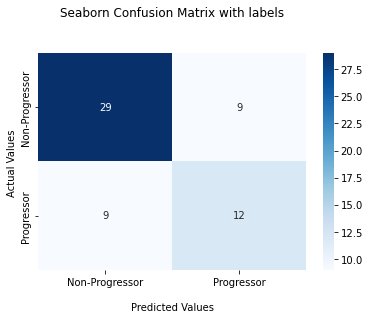

In [199]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m2_eval_test = model_2_200.evaluate(X_test, y_test)
plt.show()

500:

In [200]:
#create model2_nocall
model_2_500 = Sequential()

#add layers
model_2_500.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_2_500.add(MaxPooling1D(pool_size=3))
# model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_2_500.add(Dropout(0.5))
# model_1.add(MaxPooling1D(pool_size=2))
model_2_500.add(Flatten())
model_2_500.add(Dense(64, activation='relu'))
model_2_500.add(Dense(16, activation='relu'))
model_2_500.add(Dense(2, activation='softmax'))
model_2_500.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 766, 64)           256       
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 255, 64)          0         
 g1D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 255, 64)           0         
                                                                 
 flatten_11 (Flatten)        (None, 16320)             0         
                                                                 
 dense_33 (Dense)            (None, 64)                1044544   
                                                                 
 dense_34 (Dense)            (None, 16)                1040      
                                                     

In [201]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=500,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [202]:
model_2_500.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_2_500.fit(X_train_over, y_train_over, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
21/21 [==============================] - 1s 31ms/step - loss: 0.6941 - accuracy: 0.5078 - val_loss: 0.6676 - val_accuracy: 0.6604
Epoch 2/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6918 - accuracy: 0.5016 - val_loss: 0.6802 - val_accuracy: 0.6415
Epoch 3/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6884 - accuracy: 0.5171 - val_loss: 0.6730 - val_accuracy: 0.6604
Epoch 4/500
21/21 [==============================] - 0s 24ms/step - loss: 0.6879 - accuracy: 0.5732 - val_loss: 0.6598 - val_accuracy: 0.6792
Epoch 5/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6885 - accuracy: 0.5062 - val_loss: 0.6797 - val_accuracy: 0.6981
Epoch 6/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6869 - accuracy: 0.5467 - val_loss: 0.6632 - val_accuracy: 0.7170
Epoch 7/500
21/21 [==============================] - 1s 27ms/step - loss: 0.6794 - accuracy: 0.5498 - val_loss: 0.6647 - val_accuracy: 0.6981
Epoch 

21/21 [==============================] - 0s 23ms/step - loss: 0.4030 - accuracy: 0.8349 - val_loss: 0.7721 - val_accuracy: 0.6038
Epoch 116/500
21/21 [==============================] - 0s 22ms/step - loss: 0.4023 - accuracy: 0.8240 - val_loss: 0.7964 - val_accuracy: 0.5849
Epoch 117/500
21/21 [==============================] - 1s 26ms/step - loss: 0.3941 - accuracy: 0.8396 - val_loss: 0.8470 - val_accuracy: 0.5849
Epoch 118/500
21/21 [==============================] - 1s 24ms/step - loss: 0.3993 - accuracy: 0.8333 - val_loss: 0.8069 - val_accuracy: 0.5660
Epoch 119/500
21/21 [==============================] - 1s 25ms/step - loss: 0.3818 - accuracy: 0.8442 - val_loss: 0.7581 - val_accuracy: 0.5660
Epoch 120/500
21/21 [==============================] - 1s 24ms/step - loss: 0.3874 - accuracy: 0.8411 - val_loss: 0.7778 - val_accuracy: 0.5660
Epoch 121/500
21/21 [==============================] - 0s 21ms/step - loss: 0.3855 - accuracy: 0.8411 - val_loss: 0.7967 - val_accuracy: 0.5849
Epoch 

Epoch 172/500
21/21 [==============================] - 0s 24ms/step - loss: 0.2708 - accuracy: 0.9019 - val_loss: 0.8766 - val_accuracy: 0.6415
Epoch 173/500
21/21 [==============================] - 1s 25ms/step - loss: 0.2751 - accuracy: 0.9003 - val_loss: 0.8595 - val_accuracy: 0.6038
Epoch 174/500
21/21 [==============================] - 0s 24ms/step - loss: 0.2756 - accuracy: 0.8941 - val_loss: 0.8397 - val_accuracy: 0.5660
Epoch 175/500
21/21 [==============================] - 1s 27ms/step - loss: 0.2546 - accuracy: 0.9081 - val_loss: 0.8204 - val_accuracy: 0.5660
Epoch 176/500
21/21 [==============================] - 1s 26ms/step - loss: 0.2582 - accuracy: 0.9081 - val_loss: 0.8324 - val_accuracy: 0.5849
Epoch 177/500
21/21 [==============================] - 1s 24ms/step - loss: 0.2519 - accuracy: 0.9159 - val_loss: 0.8395 - val_accuracy: 0.5849
Epoch 178/500
21/21 [==============================] - 1s 26ms/step - loss: 0.2463 - accuracy: 0.9190 - val_loss: 0.8598 - val_accuracy:

Epoch 229/500
21/21 [==============================] - 1s 25ms/step - loss: 0.1641 - accuracy: 0.9579 - val_loss: 1.0150 - val_accuracy: 0.5472
Epoch 230/500
21/21 [==============================] - 0s 23ms/step - loss: 0.1590 - accuracy: 0.9611 - val_loss: 1.0280 - val_accuracy: 0.5472
Epoch 231/500
21/21 [==============================] - 0s 22ms/step - loss: 0.1581 - accuracy: 0.9470 - val_loss: 1.0503 - val_accuracy: 0.5472
Epoch 232/500
21/21 [==============================] - 0s 21ms/step - loss: 0.1444 - accuracy: 0.9688 - val_loss: 1.0004 - val_accuracy: 0.5660
Epoch 233/500
21/21 [==============================] - 1s 26ms/step - loss: 0.1428 - accuracy: 0.9657 - val_loss: 1.0430 - val_accuracy: 0.5472
Epoch 234/500
21/21 [==============================] - 0s 22ms/step - loss: 0.1389 - accuracy: 0.9751 - val_loss: 1.0390 - val_accuracy: 0.5472
Epoch 235/500
21/21 [==============================] - 0s 22ms/step - loss: 0.1529 - accuracy: 0.9626 - val_loss: 1.0134 - val_accuracy:

Epoch 286/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0896 - accuracy: 0.9829 - val_loss: 1.1343 - val_accuracy: 0.5660
Epoch 287/500
21/21 [==============================] - 1s 25ms/step - loss: 0.0863 - accuracy: 0.9844 - val_loss: 1.1455 - val_accuracy: 0.5660
Epoch 288/500
21/21 [==============================] - 0s 23ms/step - loss: 0.1128 - accuracy: 0.9688 - val_loss: 1.2385 - val_accuracy: 0.5472
Epoch 289/500
21/21 [==============================] - 1s 25ms/step - loss: 0.0940 - accuracy: 0.9829 - val_loss: 1.2730 - val_accuracy: 0.5660
Epoch 290/500
21/21 [==============================] - 0s 23ms/step - loss: 0.1125 - accuracy: 0.9704 - val_loss: 1.1601 - val_accuracy: 0.5472
Epoch 291/500
21/21 [==============================] - 0s 23ms/step - loss: 0.1019 - accuracy: 0.9813 - val_loss: 1.1996 - val_accuracy: 0.5094
Epoch 292/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0885 - accuracy: 0.9891 - val_loss: 1.2071 - val_accuracy:

Epoch 343/500
21/21 [==============================] - 0s 21ms/step - loss: 0.0511 - accuracy: 0.9938 - val_loss: 1.3343 - val_accuracy: 0.5472
Epoch 344/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0492 - accuracy: 0.9938 - val_loss: 1.2981 - val_accuracy: 0.5660
Epoch 345/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0500 - accuracy: 0.9922 - val_loss: 1.3612 - val_accuracy: 0.5283
Epoch 346/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0573 - accuracy: 0.9891 - val_loss: 1.4389 - val_accuracy: 0.5283
Epoch 347/500
21/21 [==============================] - 1s 24ms/step - loss: 0.0488 - accuracy: 0.9891 - val_loss: 1.3751 - val_accuracy: 0.5472
Epoch 348/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0542 - accuracy: 0.9907 - val_loss: 1.3437 - val_accuracy: 0.5660
Epoch 349/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0474 - accuracy: 0.9953 - val_loss: 1.3095 - val_accuracy:

Epoch 400/500
21/21 [==============================] - 1s 24ms/step - loss: 0.0307 - accuracy: 0.9969 - val_loss: 1.4728 - val_accuracy: 0.5660
Epoch 401/500
21/21 [==============================] - 1s 24ms/step - loss: 0.0312 - accuracy: 0.9938 - val_loss: 1.5346 - val_accuracy: 0.5660
Epoch 402/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0310 - accuracy: 0.9953 - val_loss: 1.5196 - val_accuracy: 0.5660
Epoch 403/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0279 - accuracy: 0.9984 - val_loss: 1.4997 - val_accuracy: 0.5660
Epoch 404/500
21/21 [==============================] - 1s 25ms/step - loss: 0.0282 - accuracy: 0.9969 - val_loss: 1.5849 - val_accuracy: 0.5660
Epoch 405/500
21/21 [==============================] - 1s 24ms/step - loss: 0.0282 - accuracy: 0.9984 - val_loss: 1.5883 - val_accuracy: 0.5660
Epoch 406/500
21/21 [==============================] - 1s 24ms/step - loss: 0.0390 - accuracy: 0.9953 - val_loss: 1.5971 - val_accuracy:

Epoch 457/500
21/21 [==============================] - 0s 22ms/step - loss: 0.0174 - accuracy: 0.9969 - val_loss: 1.7093 - val_accuracy: 0.5472
Epoch 458/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 1.7333 - val_accuracy: 0.5660
Epoch 459/500
21/21 [==============================] - 0s 24ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 1.7429 - val_accuracy: 0.5660
Epoch 460/500
21/21 [==============================] - 0s 22ms/step - loss: 0.0163 - accuracy: 0.9984 - val_loss: 1.7100 - val_accuracy: 0.5660
Epoch 461/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0175 - accuracy: 0.9984 - val_loss: 1.6881 - val_accuracy: 0.5660
Epoch 462/500
21/21 [==============================] - 1s 25ms/step - loss: 0.0320 - accuracy: 0.9938 - val_loss: 1.7101 - val_accuracy: 0.5660
Epoch 463/500
21/21 [==============================] - 0s 24ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 1.7431 - val_accuracy:

In [203]:
m2_eval_test = model_2_500.evaluate(X_test, y_test)
m2_eval_val = model_2_500.evaluate(X_val, y_val)

2/2 [==============================] - 0s 6ms/step - loss: 1.8312 - accuracy: 0.6038


In [204]:
pred = model_2_500.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 6ms/step
roc auc score:  0.5726817042606517
average precision score:  0.6156977792986061


In [205]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 6ms/step - loss: 1.9019 - accuracy: 0.6441


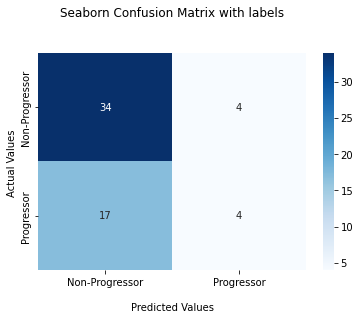

In [206]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m2_eval_test = model_2_500.evaluate(X_test, y_test)
plt.show()

### Idea 3: Using 'RNFLT 1 to 768' as the predictors, 'Y_combined' as the dependent variable, no resampling, k-fold validation method 

In [208]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [209]:
#Define a function for getting new CNN models.
def get_model():
    #create model
    model = Sequential()

    #add layers
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
    model.add(MaxPooling1D(pool_size=3))
    # model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    # model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    #Here we use cross-entropy as the criteria for loss.
    return model

In [210]:
#k-fold
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [211]:
#Join the training set and validation set together.
X_trainval = np.concatenate((X_train, X_val), axis=0)
X_trainval.shape

(516, 768, 1)

In [212]:
y_trainval = np.concatenate((y_train, y_val), axis = 0)
y_trainval.shape

(516, 2)

In [213]:
y_trainval

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [216]:
sum(y_trainval[:, 1])/sum(y_trainval[:, 0])
#since this result is less than 1, we can know that the first col is non-progressor and the second col is progressor. 

0.449438202247191

In [217]:
y_trainval = y_trainval[:, 1] #Only keep the progressor column

In [219]:
# Variable for keeping count of split we are executing
j = 0
list_kfold = list(kfold.split(X_trainval, y_trainval))
data_kfold = pd.DataFrame()
for i in range(5):
    train_idx, val_idx = list_kfold[i]
    X_train_kfold = X_trainval[train_idx]
    y_train_kfold = y_trainval[train_idx]
    y_train_kfold_complement = 1 - y_train_kfold 
    #Compute its complement and try to join it with 'y_train_kfold' to make it 2-D.
    y_train_kfold = np.stack((y_train_kfold, y_train_kfold_complement), axis=1)
    #RMK, here col[0] is progressor, col[1] is non-pro
    X_val_kfold = X_trainval[val_idx]
    y_val_kfold = y_trainval[val_idx]
    y_val_kfold_complement = 1 - y_val_kfold
    y_val_kfold = np.stack((y_val_kfold, y_val_kfold_complement), axis=1)
    ##RMK, here col[0] is progressor, col[1] is non-pro
    j += 1
    model_kfold = get_model()
    model_kfold.fit(X_train_kfold, y_train_kfold,
                   validation_data = (X_val_kfold, y_val_kfold),
                   epochs = 500, verbose = True,
                   callbacks = [early_stopping_monitor])
    pred = model_kfold.predict(X_test)
    predicted_class_indices=np.argmax(pred, axis = 1)
    data_kfold[j] = predicted_class_indices
#    gc.collect()    

Epoch 1/500
13/13 [==============================] - 1s 38ms/step - loss: 0.6252 - accuracy: 0.6869 - val_loss: 0.6019 - val_accuracy: 0.6923
Epoch 2/500
13/13 [==============================] - 0s 26ms/step - loss: 0.6107 - accuracy: 0.6893 - val_loss: 0.6007 - val_accuracy: 0.6923
Epoch 3/500
13/13 [==============================] - 0s 24ms/step - loss: 0.6089 - accuracy: 0.6893 - val_loss: 0.6005 - val_accuracy: 0.6923
Epoch 4/500
13/13 [==============================] - 0s 26ms/step - loss: 0.6052 - accuracy: 0.6893 - val_loss: 0.6009 - val_accuracy: 0.6923
Epoch 5/500
13/13 [==============================] - 0s 29ms/step - loss: 0.6055 - accuracy: 0.6893 - val_loss: 0.6008 - val_accuracy: 0.6923
Epoch 6/500
13/13 [==============================] - 0s 29ms/step - loss: 0.6039 - accuracy: 0.6893 - val_loss: 0.6002 - val_accuracy: 0.6923
Epoch 7/500
13/13 [==============================] - 0s 31ms/step - loss: 0.6002 - accuracy: 0.6893 - val_loss: 0.6000 - val_accuracy: 0.6923
Epoch 

13/13 [==============================] - 0s 25ms/step - loss: 0.5741 - accuracy: 0.7070 - val_loss: 0.6339 - val_accuracy: 0.6214
Epoch 15/500
13/13 [==============================] - 0s 26ms/step - loss: 0.5701 - accuracy: 0.7119 - val_loss: 0.6348 - val_accuracy: 0.6311
Epoch 16/500
13/13 [==============================] - 0s 25ms/step - loss: 0.5642 - accuracy: 0.7215 - val_loss: 0.6384 - val_accuracy: 0.6311
Epoch 17/500
13/13 [==============================] - 0s 29ms/step - loss: 0.5670 - accuracy: 0.6925 - val_loss: 0.6366 - val_accuracy: 0.6311
Epoch 18/500
13/13 [==============================] - 0s 25ms/step - loss: 0.5619 - accuracy: 0.7143 - val_loss: 0.6400 - val_accuracy: 0.6311
Epoch 19/500
13/13 [==============================] - 0s 28ms/step - loss: 0.5608 - accuracy: 0.7264 - val_loss: 0.6382 - val_accuracy: 0.6214
Epoch 20/500
13/13 [==============================] - 0s 30ms/step - loss: 0.5666 - accuracy: 0.7191 - val_loss: 0.6393 - val_accuracy: 0.6311
Epoch 21/500

13/13 [==============================] - 0s 25ms/step - loss: 0.5641 - accuracy: 0.7240 - val_loss: 0.5775 - val_accuracy: 0.6796
Epoch 28/500
13/13 [==============================] - 0s 25ms/step - loss: 0.5621 - accuracy: 0.7046 - val_loss: 0.5779 - val_accuracy: 0.6602
Epoch 29/500
13/13 [==============================] - 0s 24ms/step - loss: 0.5589 - accuracy: 0.7167 - val_loss: 0.5764 - val_accuracy: 0.6699
Epoch 30/500
13/13 [==============================] - 0s 25ms/step - loss: 0.5572 - accuracy: 0.7215 - val_loss: 0.5786 - val_accuracy: 0.6893
Epoch 31/500
13/13 [==============================] - 0s 27ms/step - loss: 0.5575 - accuracy: 0.7046 - val_loss: 0.5772 - val_accuracy: 0.6699
Epoch 32/500
13/13 [==============================] - 0s 24ms/step - loss: 0.5513 - accuracy: 0.7143 - val_loss: 0.5774 - val_accuracy: 0.6699
Epoch 33/500
13/13 [==============================] - 0s 25ms/step - loss: 0.5504 - accuracy: 0.7143 - val_loss: 0.5759 - val_accuracy: 0.6893
Epoch 34/500

13/13 [==============================] - 0s 25ms/step - loss: 0.4973 - accuracy: 0.7724 - val_loss: 0.6350 - val_accuracy: 0.7087
Epoch 41/500
13/13 [==============================] - 0s 26ms/step - loss: 0.4880 - accuracy: 0.7724 - val_loss: 0.6423 - val_accuracy: 0.6990
Epoch 42/500
13/13 [==============================] - 0s 25ms/step - loss: 0.4961 - accuracy: 0.7676 - val_loss: 0.6419 - val_accuracy: 0.7087
Epoch 43/500
13/13 [==============================] - 0s 26ms/step - loss: 0.4933 - accuracy: 0.7627 - val_loss: 0.6524 - val_accuracy: 0.6990
Epoch 44/500
13/13 [==============================] - 0s 25ms/step - loss: 0.4955 - accuracy: 0.7627 - val_loss: 0.6412 - val_accuracy: 0.6990
Epoch 45/500
13/13 [==============================] - 0s 27ms/step - loss: 0.4865 - accuracy: 0.7724 - val_loss: 0.6419 - val_accuracy: 0.7087
Epoch 46/500
13/13 [==============================] - 0s 28ms/step - loss: 0.4875 - accuracy: 0.7748 - val_loss: 0.6552 - val_accuracy: 0.6990
Epoch 47/500

Epoch 28/500
13/13 [==============================] - 0s 26ms/step - loss: 0.5759 - accuracy: 0.7094 - val_loss: 0.5825 - val_accuracy: 0.6699
Epoch 29/500
13/13 [==============================] - 0s 25ms/step - loss: 0.5752 - accuracy: 0.7070 - val_loss: 0.5810 - val_accuracy: 0.6699
Epoch 30/500
13/13 [==============================] - 0s 27ms/step - loss: 0.5698 - accuracy: 0.7094 - val_loss: 0.5832 - val_accuracy: 0.6699
Epoch 31/500
13/13 [==============================] - 0s 24ms/step - loss: 0.5735 - accuracy: 0.7094 - val_loss: 0.5827 - val_accuracy: 0.6699
Epoch 32/500
13/13 [==============================] - 0s 26ms/step - loss: 0.5697 - accuracy: 0.7094 - val_loss: 0.5819 - val_accuracy: 0.6699
Epoch 33/500
13/13 [==============================] - 0s 24ms/step - loss: 0.5698 - accuracy: 0.7070 - val_loss: 0.5824 - val_accuracy: 0.6505
Epoch 34/500
13/13 [==============================] - 0s 25ms/step - loss: 0.5647 - accuracy: 0.7240 - val_loss: 0.5850 - val_accuracy: 0.6311

In [220]:
data_kfold

,1,2,3,4,5
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,0,1
4,1,1,1,1,1
5,1,1,1,0,1
6,1,1,1,1,1
7,1,1,1,1,1
8,1,1,1,0,1
9,1,1,1,1,1


In [221]:
data_kfold_arr = np.array(data_kfold) #Convert 'data_kfold' from a dataframe to an array.
data_kfold_arr

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1,

In [222]:
predict_kfold = np.array(range(59))
for i in range(59):
    sum_kfold = sum(data_kfold_arr[i])
    if sum_kfold < 3:
        predict_kfold[i] = 0
    else:
        predict_kfold[i] = 1

In [223]:
predict_kfold

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

All results are 1, so the prediction is too bad. I will try another threshold.

In [240]:
predict_kfold = np.array(range(59))
for i in range(59):
    sum_kfold = sum(data_kfold_arr[i])
    if sum_kfold <5:
        predict_kfold[i] = 0
    else:
        predict_kfold[i] = 1

In [241]:
predict_kfold

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

Once there is a 0, then we will consider this patient is a progressor.

In [242]:
predict_kfold_complement = 1 - predict_kfold
predict_kfold_2D = np.stack((predict_kfold, predict_kfold_complement), axis=1)
predict_kfold_2D

array([[1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0]])

In [235]:
y_test

,Non-Progressor,Progressor
28,1,0
29,1,0
71,0,1
72,0,1
73,0,1
96,0,1
97,1,0
122,1,0
123,0,1
152,1,0


In [238]:
y_test.shape

(59, 2)

In [243]:
predict_kfold_2D = pd.DataFrame(predict_kfold_2D, columns=('Non-Progressor', 'Progressor'))
predict_kfold_2D

,Non-Progressor,Progressor
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
5,0,1
6,1,0
7,1,0
8,0,1
9,1,0


In [244]:
predict_kfold_2D.shape

(59, 2)

Evaluation

In [245]:
roc_value = roc_auc_score(y_test, predict_kfold_2D)
ap_score = average_precision_score(y_test, predict_kfold_2D)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

roc auc score:  0.6165413533834587
average precision score:  0.585575978830426


In [246]:
y_c = predict_kfold_2D.to_numpy()
y_c = y_c.astype('int32')
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

Accuracy is 0.7119.


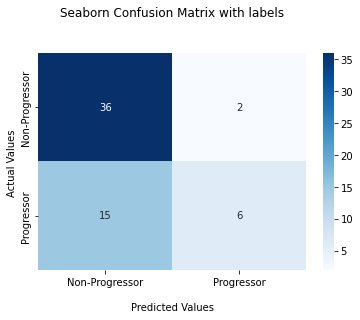

In [248]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
print(f'Accuracy is {(cf_matrix[0,0]+cf_matrix[1,1])/(sum(sum(cf_matrix)))}.')
plt.show()

### Idea 4: Using 'RNFLT 1 to 768' as the predictors, 'Y_combined' as the dependent variable, with resampling, k-fold validation method 

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [30]:
#Define a function for getting new CNN models.
def get_model():
    #create model
    model = Sequential()

    #add layers
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
    model.add(MaxPooling1D(pool_size=3))
    # model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    # model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    #Here we use cross-entropy as the criteria for loss.
    return model

In [31]:
#k-fold
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [32]:
#Join the training set and validation set together.
X_trainval = np.concatenate((X_train, X_val), axis=0)
X_trainval.shape

(516, 768, 1)

In [33]:
y_trainval = np.concatenate((y_train, y_val), axis = 0)
y_trainval.shape

(516, 2)

In [34]:
y_trainval

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [35]:
sum(y_trainval[:, 1])/sum(y_trainval[:, 0])
#since this result is less than 1, we can know that the first col is non-progressor and the second col is 
#progressor. 

0.449438202247191

In [36]:
y_trainval = y_trainval[:, 1] #Only keep the progressor column

**Testing:**

In [57]:
list_kfold = list(kfold.split(X_trainval, y_trainval))
train_idx, val_idx = list_kfold[0]
X_train_kfold = X_trainval[train_idx]
y_train_kfold = y_trainval[train_idx]

In [39]:
X_train_kfold.shape

(412, 768, 1)

In [43]:
X_train_kfold_2d = np.reshape(X_train_kfold, (X_train_kfold.shape[0], X_train_kfold.shape[1]))
X_train_kfold_2d.shape

(412, 768)

In [40]:
y_train_kfold.shape

(412,)

In [41]:
y_train_kfold_arr=np.array(y_train_kfold)
len(y_train_kfold_arr)

412

In [42]:
y_train_kfold_arr

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [44]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 'minority')
X_train_kfold_over, y_train_kfold_over = oversample.fit_resample(X_train_kfold_2d, y_train_kfold_arr)
print(X_train_kfold_over.shape)
y_train_kfold_over

(568, 768)


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [45]:
y_train_kfold_over = pd.get_dummies(y_train_kfold_over)
y_train_kfold_over

,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
563,0,1
564,0,1
565,0,1
566,0,1


In [46]:
y_train_kfold_over=y_train_kfold_over.rename(columns={0: "Non-Progressor", 1: "Progressor"})
print(y_train_kfold_over.value_counts(), '\n')

Non-Progressor  Progressor
0               1             284
1               0             284
dtype: int64 



In [49]:
y_train_kfold_over

,Non-Progressor,Progressor
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
563,0,1
564,0,1
565,0,1
566,0,1


In [55]:
X_train_kfold_over = np.reshape(X_train_kfold_over, (X_train_kfold_over.shape[0], X_train_kfold_over.shape[1], 1))
X_train_kfold_over.shape

(568, 768, 1)

**Testing End**

In [82]:
#Define a method for getting the resampled data set from the original data set based on the above test.
def get_resampling(X_train_kfold, y_train_kfold):
    X_train_kfold_2d = np.reshape(X_train_kfold, (X_train_kfold.shape[0], X_train_kfold.shape[1]))
    y_train_kfold_arr=np.array(y_train_kfold)
    from imblearn.over_sampling import RandomOverSampler
    oversample = RandomOverSampler(sampling_strategy = 'minority')
    X_train_kfold_over, y_train_kfold_over = oversample.fit_resample(X_train_kfold_2d, y_train_kfold_arr)
    y_train_kfold_over = pd.get_dummies(y_train_kfold_over)#Convert the array to a data frame.
    y_train_kfold_over = y_train_kfold_over.rename(columns={0: "Non-Progressor", 1: "Progressor"})#Rename it.
    X_train_kfold_over = np.reshape(X_train_kfold_over, (X_train_kfold_over.shape[0], X_train_kfold_over.shape[1], 1))
    #Reshape the X_train_kfold_over in order to apply CNN model on it.
    return (X_train_kfold_over, y_train_kfold_over)

In [83]:
# Variable for keeping count of split we are executing
j = 0
list_kfold = list(kfold.split(X_trainval, y_trainval))
data_kfold = pd.DataFrame()
for i in range(5):
    train_idx, val_idx = list_kfold[i]
    X_train_kfold = X_trainval[train_idx]
    y_train_kfold = y_trainval[train_idx]
    X_train_kfold_over, y_train_kfold_over = get_resampling(X_train_kfold, y_train_kfold)  
    X_val_kfold = X_trainval[val_idx]
    y_val_kfold = y_trainval[val_idx]
    y_val_kfold_complement = 1 - y_val_kfold
    y_val_kfold = np.stack((y_val_kfold_complement, y_val_kfold), axis=1)
    #RMK, here since y_train_kfold_over's order is non-pro, pro, we set y_val_kfold's order also be non-pro, pro
    j += 1
    model_kfold = get_model()
    model_kfold.fit(X_train_kfold_over, y_train_kfold_over,
                   validation_data = (X_val_kfold, y_val_kfold),
                   epochs = 500, verbose = True,
                   callbacks = [early_stopping_monitor])
    pred = model_kfold.predict(X_test)
    predicted_class_indices=np.argmax(pred, axis = 1)
    data_kfold[j] = predicted_class_indices
#    gc.collect()    

Epoch 1/500
18/18 [==============================] - 1s 35ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6729 - val_accuracy: 0.6731
Epoch 2/500
18/18 [==============================] - 0s 25ms/step - loss: 0.6797 - accuracy: 0.5687 - val_loss: 0.6295 - val_accuracy: 0.6827
Epoch 3/500
18/18 [==============================] - 1s 30ms/step - loss: 0.6660 - accuracy: 0.6056 - val_loss: 0.6623 - val_accuracy: 0.6346
Epoch 4/500
18/18 [==============================] - 1s 32ms/step - loss: 0.6464 - accuracy: 0.6338 - val_loss: 0.6692 - val_accuracy: 0.5673
Epoch 5/500
18/18 [==============================] - 0s 27ms/step - loss: 0.6317 - accuracy: 0.6673 - val_loss: 0.7046 - val_accuracy: 0.5577
Epoch 6/500
18/18 [==============================] - 0s 27ms/step - loss: 0.6259 - accuracy: 0.6813 - val_loss: 0.6660 - val_accuracy: 0.5769
Epoch 7/500
18/18 [==============================] - 1s 31ms/step - loss: 0.6138 - accuracy: 0.6866 - val_loss: 0.6505 - val_accuracy: 0.6346
Epoch 

18/18 [==============================] - 0s 24ms/step - loss: 0.6327 - accuracy: 0.6737 - val_loss: 0.6866 - val_accuracy: 0.5728
Epoch 14/500
18/18 [==============================] - 0s 24ms/step - loss: 0.6308 - accuracy: 0.6596 - val_loss: 0.7446 - val_accuracy: 0.4951
Epoch 15/500
18/18 [==============================] - 0s 24ms/step - loss: 0.6287 - accuracy: 0.6719 - val_loss: 0.6669 - val_accuracy: 0.6019
Epoch 16/500
18/18 [==============================] - 0s 26ms/step - loss: 0.6224 - accuracy: 0.6632 - val_loss: 0.7233 - val_accuracy: 0.5243
Epoch 17/500
18/18 [==============================] - 0s 27ms/step - loss: 0.6203 - accuracy: 0.6895 - val_loss: 0.6954 - val_accuracy: 0.5728
Epoch 18/500
18/18 [==============================] - 0s 25ms/step - loss: 0.6158 - accuracy: 0.6789 - val_loss: 0.7183 - val_accuracy: 0.5534
Epoch 19/500
18/18 [==============================] - 1s 29ms/step - loss: 0.6187 - accuracy: 0.6772 - val_loss: 0.6716 - val_accuracy: 0.5922
Epoch 20/500

18/18 [==============================] - 1s 30ms/step - loss: 0.5753 - accuracy: 0.6754 - val_loss: 0.6829 - val_accuracy: 0.6117
Epoch 27/500
18/18 [==============================] - 0s 26ms/step - loss: 0.5699 - accuracy: 0.6860 - val_loss: 0.6926 - val_accuracy: 0.6117
Epoch 28/500
18/18 [==============================] - 0s 27ms/step - loss: 0.5682 - accuracy: 0.6877 - val_loss: 0.6945 - val_accuracy: 0.6214
Epoch 29/500
18/18 [==============================] - 0s 28ms/step - loss: 0.5641 - accuracy: 0.6754 - val_loss: 0.6899 - val_accuracy: 0.6117
Epoch 30/500
18/18 [==============================] - 0s 21ms/step - loss: 0.5599 - accuracy: 0.6930 - val_loss: 0.6884 - val_accuracy: 0.6311
Epoch 31/500
18/18 [==============================] - 0s 27ms/step - loss: 0.5612 - accuracy: 0.6947 - val_loss: 0.6923 - val_accuracy: 0.5922
Epoch 32/500
18/18 [==============================] - 0s 27ms/step - loss: 0.5596 - accuracy: 0.6947 - val_loss: 0.7436 - val_accuracy: 0.5728
Epoch 33/500

18/18 [==============================] - 0s 28ms/step - loss: 0.5487 - accuracy: 0.7281 - val_loss: 0.6531 - val_accuracy: 0.6796
Epoch 34/500
18/18 [==============================] - 1s 29ms/step - loss: 0.5528 - accuracy: 0.7018 - val_loss: 0.6646 - val_accuracy: 0.6602
Epoch 35/500
18/18 [==============================] - 0s 28ms/step - loss: 0.5468 - accuracy: 0.7211 - val_loss: 0.7138 - val_accuracy: 0.5631
Epoch 36/500
18/18 [==============================] - 1s 28ms/step - loss: 0.5429 - accuracy: 0.7228 - val_loss: 0.6601 - val_accuracy: 0.6796
Epoch 37/500
18/18 [==============================] - 1s 31ms/step - loss: 0.5330 - accuracy: 0.7333 - val_loss: 0.6731 - val_accuracy: 0.6505
Epoch 38/500
18/18 [==============================] - 0s 28ms/step - loss: 0.5278 - accuracy: 0.7316 - val_loss: 0.7044 - val_accuracy: 0.5922
Epoch 39/500
18/18 [==============================] - 1s 30ms/step - loss: 0.5241 - accuracy: 0.7561 - val_loss: 0.6663 - val_accuracy: 0.6699
Epoch 40/500

18/18 [==============================] - 0s 25ms/step - loss: 0.5618 - accuracy: 0.7228 - val_loss: 0.6661 - val_accuracy: 0.6019
Epoch 35/500
18/18 [==============================] - 0s 24ms/step - loss: 0.5633 - accuracy: 0.7298 - val_loss: 0.6909 - val_accuracy: 0.5825
Epoch 36/500
18/18 [==============================] - 0s 24ms/step - loss: 0.5556 - accuracy: 0.7333 - val_loss: 0.7281 - val_accuracy: 0.5437
Epoch 37/500
18/18 [==============================] - 0s 25ms/step - loss: 0.5513 - accuracy: 0.7246 - val_loss: 0.6912 - val_accuracy: 0.5631
Epoch 38/500
18/18 [==============================] - 0s 25ms/step - loss: 0.5497 - accuracy: 0.7439 - val_loss: 0.6987 - val_accuracy: 0.5631
Epoch 39/500
18/18 [==============================] - 0s 25ms/step - loss: 0.5447 - accuracy: 0.7368 - val_loss: 0.6817 - val_accuracy: 0.5631
Epoch 40/500
18/18 [==============================] - 0s 27ms/step - loss: 0.5446 - accuracy: 0.7263 - val_loss: 0.7253 - val_accuracy: 0.5534
Epoch 41/500

In [84]:
data_kfold
#RMK, since we set the first column to be non-pro, second to be pro, we get 0 as predicted non-pro, 1 as predicted 
#pro.

,1,2,3,4,5
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,1,1,1
6,0,0,1,1,0
7,0,0,0,0,0
8,0,0,0,1,0
9,0,0,0,0,0


In [85]:
data_kfold_arr = np.array(data_kfold) #Convert 'data_kfold' from a dataframe to an array.
data_kfold_arr

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0,

Once there is at least one 1, then we will consider this patient is a progressor.

In [90]:
predict_kfold = np.array(range(len(data_kfold_arr)))
for i in range(len(data_kfold_arr)):
    sum_kfold = sum(data_kfold_arr[i])
    if sum_kfold > 0:
        predict_kfold[i] = 1 #Progressor
    else:
        predict_kfold[i] = 0 #Non-progressor

In [91]:
predict_kfold

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [92]:
predict_kfold_complement = 1 - predict_kfold #Column for non-pro
predict_kfold_2D = np.stack((predict_kfold_complement, predict_kfold), axis=1)
predict_kfold_2D = pd.DataFrame(predict_kfold_2D, columns=('Non-Progressor', 'Progressor'))
predict_kfold_2D

,Non-Progressor,Progressor
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,1
6,0,1
7,1,0
8,0,1
9,1,0


Evaluation:

In [93]:
roc_value = roc_auc_score(y_test, predict_kfold_2D)
ap_score = average_precision_score(y_test, predict_kfold_2D)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

roc auc score:  0.5983709273182958
average precision score:  0.55845920978615


In [94]:
y_c = predict_kfold_2D.to_numpy()
y_c = y_c.astype('int32')
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

Accuracy is 0.6610169491525424.


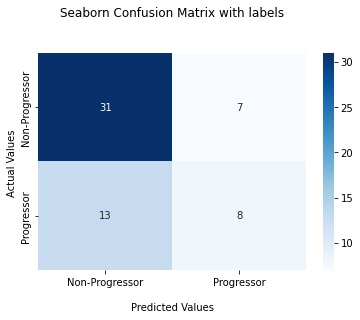

In [102]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
print(f'Accuracy is {(cf_matrix[0,0]+cf_matrix[1,1])/(sum(sum(cf_matrix)))}.')
plt.show()

### Idea 5: Using all numerical values as the predictors, 'Y_combined' as the dependent variable, no resampling, CNN method

In [ ]:
#Adding every numerical variables into the list of predictors.
df = df_raw.iloc[:, np.r_[1, 28:797, 814]]
df